# Tutorial 4.1 XXX
In this tutorial 

In [141]:
import numpy as np
import math
import matplotlib.pyplot as plt

# mesh parameters
# void mesh -- circular void to imitate stress hole
# nodes follow circular path (up to 64)
d1 = 1
d2 = 1
p = 4
m = 3
R = 0.2
element_type = 'D2QU4N' # quadrilateral
# element_type = 'D2TR3N' # triangular

In [142]:
# Add drawing -- 4 regions
# Each region has m*p pieces, but we cannot double-count the diagonals
def void_mesh(d1, d2, p, m, R, element_type):
    
    q = np.array([[0,0],
                  [d1, 0],
                  [0, d2],
                  [d1,d2]])
    PD = 2
    NoN = 2*(p+1)*(m+1) + 2*(p-1)*(m+1)
    NoE = 4*p*m
    NPE = 4 #D2QU4N

    # Node
    NL = np.zeros([NoN,PD])
    a = (q[1,0]-q[0,0])/p
    b = (q[2,1]-q[0,1])/p

    # Region 1
    coor11 = np.zeros([(p+1)*(m+1),PD])
    for i in range(1,p+2): 
        #value from 1 to p+1 actually then
        # get bottom line
        coor11[i-1,0] = q[0,0] + (i-1)*a
        coor11[i-1,1] = q[0,1]
    for i in range(1,p+2): 
        #value from 1 to p+1 actually then
        # get void line
        # Based on angle from center point
        coor11[m*(p+1)+i-1,0] = R*np.cos( (5*math.pi/4) + (i-1)*((math.pi/2)/p) ) + d1/2
        coor11[m*(p+1)+i-1,1] = R*np.sin( (5*math.pi/4) + (i-1)*((math.pi/2)/p) ) + d2/2
    for i in range(1, m):
        # lines on top/bot already covered, so need 2 less than "m+2"
        for j in range(1,p+2):
            # lines on the sides still need doing -- still need p+2 then
            # will not be needed later for other "neighbour regions"
            dx = (coor11[m*(p+1)+j-1, 0] - coor11[j-1, 0])/m
            dy = (coor11[m*(p+1)+j-1, 1] - coor11[j-1, 1])/m
            coor11[i*(p+1)+j-1, 0] = coor11[(i-1)*(p+1)+j-1,0] + dx
            coor11[i*(p+1)+j-1, 1] = coor11[(i-1)*(p+1)+j-1,1] + dy

    # Region 2
    coor22 = np.zeros([(p+1)*(m+1),PD])
    for i in range(1,p+2): 
        coor22[i-1,0] = q[2,0] + (i-1)*a
        coor22[i-1,1] = q[2,1]
    for i in range(1,p+2): 
        coor22[m*(p+1)+i-1,0] = R*np.cos( (3*math.pi/4) - (i-1)*((math.pi/2)/p) ) + d1/2
        coor22[m*(p+1)+i-1,1] = R*np.sin( (3*math.pi/4) - (i-1)*((math.pi/2)/p) ) + d2/2
    for i in range(1, m):
        for j in range(1,p+2):
            dx = (coor22[m*(p+1)+j-1, 0] - coor22[j-1, 0])/m
            dy = (coor22[m*(p+1)+j-1, 1] - coor22[j-1, 1])/m
            coor22[i*(p+1)+j-1, 0] = coor22[(i-1)*(p+1)+j-1,0] + dx
            coor22[i*(p+1)+j-1, 1] = coor22[(i-1)*(p+1)+j-1,1] + dy

    # Region 3
    coor33 = np.zeros([(p-1)*(m+1),PD]) # p-1 here!
    for i in range(1,p):  # Note here: onpy to p (not "diagonals")
        coor33[i-1,0] = q[0,0]
        coor33[i-1,1] = q[0,1] + i*b # not i-1 -- leave out diagonal line
    for i in range(1,p): 
        coor33[m*(p-1)+i-1,0] = R*np.cos( (5*math.pi/4) - (i)*((math.pi/2)/p) )+ d1/2
        coor33[m*(p-1)+i-1,1] = R*np.sin( (5*math.pi/4) - (i)*((math.pi/2)/p) ) + d2/2
    for i in range(1, m):
        for j in range(1,p):
            dx = (coor33[m*(p-1)+j-1, 0] - coor33[j-1, 0])/m
            dy = (coor33[m*(p-1)+j-1, 1] - coor33[j-1, 1])/m
            coor33[i*(p-1)+j-1, 0] = coor33[(i-1)*(p-1)+j-1,0] + dx
            coor33[i*(p-1)+j-1, 1] = coor33[(i-1)*(p-1)+j-1,1] + dy
    
    # Region 4
    coor44 = np.zeros([(p-1)*(m+1),PD]) # p-1 here!
    for i in range(1,p):  # Note here: onpy to p (not "diagonals")
        coor44[i-1,0] = q[1,0]
        coor44[i-1,1] = q[1,1] + i*b # not i-1 -- leave out diagonal line
    for i in range(1,p): 
        coor44[m*(p-1)+i-1,0] = R*np.cos( (7*math.pi/4) + (i)*((math.pi/2)/p) ) + d1/2
        coor44[m*(p-1)+i-1,1] = R*np.sin( (7*math.pi/4) + (i)*((math.pi/2)/p) ) + d2/2
    for i in range(1, m):
        for j in range(1,p):
            dx = (coor44[m*(p-1)+j-1, 0] - coor44[j-1, 0])/m
            dy = (coor44[m*(p-1)+j-1, 1] - coor44[j-1, 1])/m
            coor44[i*(p-1)+j-1, 0] = coor44[(i-1)*(p-1)+j-1,0] + dx
            coor44[i*(p-1)+j-1, 1] = coor44[(i-1)*(p-1)+j-1,1] + dy

    # Reorder - to simplify element generation
    for i in range(1,m+2):
        NL[(i-1)*4*p:i*4*p,:] = np.vstack([ coor11[(i-1)*(p+1):(i)*(p+1),:],
                                            coor44[(i-1)*(p-1):(i)*(p-1),:],
                                            np.flipud(coor22[(i-1)*(p+1):(i)*(p+1),:]),
                                            np.flipud(coor33[(i-1)*(p-1):(i)*(p-1),:])])
    
    # Element
    EL = np.zeros([NoE,NPE])
    for i in range(1,m+1):
        for j in range(1,4*p+1):
            if j == 1:
                EL[(i-1)*(4*p)+j-1, 0] = (i-1)*(4*p) + j
                EL[(i-1)*(4*p)+j-1, 1] = EL[(i-1)*(4*p) + j -1 , 0] + 1
                EL[(i-1)*(4*p)+j-1, 3] = EL[(i-1)*(4*p) + j -1 , 0] + 4*p
                EL[(i-1)*(4*p)+j-1, 2] = EL[(i-1)*(4*p) + j -1 , 3] + 1
            elif j == 4*p:
                EL[(i-1)*(4*p)+j-1, 0] = (i)*(4*p)
                EL[(i-1)*(4*p)+j-1, 1] = (i-1)*(4*p) + 1 
                EL[(i-1)*(4*p)+j-1, 2] = EL[(i-1)*(4*p) + j -1 , 0] + 1
                EL[(i-1)*(4*p)+j-1, 3] = EL[(i-1)*(4*p) + j -1 , 0] + 4*p
            else:
                EL[(i-1)*(4*p)+j-1, 0] = EL[(i-1)*(4*p) + j -2 , 1]
                EL[(i-1)*(4*p)+j-1, 3] = EL[(i-1)*(4*p) + j -2 , 2]
                EL[(i-1)*(4*p)+j-1, 2] = EL[(i-1)*(4*p) + j -1 , 3] + 1
                EL[(i-1)*(4*p)+j-1, 1] = EL[(i-1)*(4*p) + j -1 , 0] + 1
    
    # triangular elements
    if element_type == 'D2TR3N': 
        NPE_new = 3
        NoE_new = 2*NoE
        EL_new = np.zeros([NoE_new, NPE_new])

        for i in range(1, NoE+1):
            # element 1
            EL_new[2*(i-1), 0] = EL[i-1, 0]
            EL_new[2*(i-1), 1] = EL[i-1, 1]
            EL_new[2*(i-1), 2] = EL[i-1, 2]
            # element 2
            EL_new[2*(i-1)+1, 0] = EL[i-1, 0]
            EL_new[2*(i-1)+1, 1] = EL[i-1, 2]
            EL_new[2*(i-1)+1, 2] = EL[i-1, 3]
        EL = EL_new

    EL = EL.astype(int)
    return (NL, EL)

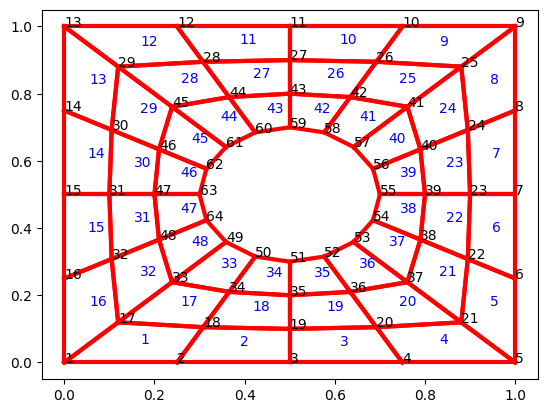

In [143]:
NL, EL = void_mesh(d1, d2, p, m, R, element_type)

NoN = np.size(NL, 0)
NoE = np.size(EL, 0)

plt.figure(1)

count = 1
for i in range(0, NoN):
    plt.annotate(count, xy = (NL[i,0],NL[i,1]))
    count += 1

if element_type == 'D2QU4N':
    count2 = 1
    for j in range(0, NoE):
        plt.annotate(count2, xy = ((NL[EL[j,0]-1,0]+NL[EL[j,1]-1,0]+NL[EL[j,2]-1,0]+NL[EL[j,3]-1,0])/4,
                                   (NL[EL[j,0]-1,1]+NL[EL[j,1]-1,1]+NL[EL[j,2]-1,1]+NL[EL[j,3]-1,1])/4),
                                  c = 'blue')
        count2 += 1

    # Plot lines
    x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
    x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
    x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
    x3, y3 = NL[EL[:,3]-1,0], NL[EL[:,3]-1,1]
    plt.plot(np.array([x0,x1]), np.array([y0,y1]), 'red', lw=3)
    plt.plot(np.array([x1,x2]), np.array([y1,y2]), 'red', lw=3)
    plt.plot(np.array([x2,x3]), np.array([y2,y3]), 'red', lw=3)
    plt.plot(np.array([x3,x0]), np.array([y3,y0]), 'red', lw=3)


if element_type == 'D2TR3N':

    count2 = 1
    for j in range(0, NoE):
        plt.annotate(count2, xy = ((NL[EL[j,0]-1,0]+NL[EL[j,1]-1,0]+NL[EL[j,2]-1,0])/3,
                                   (NL[EL[j,0]-1,1]+NL[EL[j,1]-1,1]+NL[EL[j,2]-1,1])/3),
                                  c = 'blue')
        count2 += 1

    # Plot lines
    x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
    x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
    x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
    plt.plot(np.array([x0,x1]), np.array([y0,y1]), 'red', lw=3)
    plt.plot(np.array([x1,x2]), np.array([y1,y2]), 'red', lw=3)
    plt.plot(np.array([x2,x0]), np.array([y2,y0]), 'red', lw=3)

In [144]:
def GaussPoint(NPE, GPE, gp): # Gaussian point theory needed
    if NPE == 3:
        if GPE == 1:
            if gp == 1:
                xi, eta, alpha = 1/3, 1/3, 1
    if NPE == 4:
        if GPE == 1:
            if gp == 1:
                xi, eta, alpha = 0, 0, 4
        if GPE == 4:
            if gp == 1:
                xi, eta, alpha = -1/math.sqrt(3), -1/math.sqrt(3), 1
            if gp == 2:
                xi, eta, alpha = 1/math.sqrt(3), -1/math.sqrt(3), 1
            if gp == 3:
                xi, eta, alpha = 1/math.sqrt(3), 1/math.sqrt(3), 1
            if gp == 4:
                xi, eta, alpha = -1/math.sqrt(3), 1/math.sqrt(3), 1

    return (xi, eta, alpha)

def grad_N_nat(NPE, xi, eta):

    PD = 2
    result = np.zeros([PD, NPE])

    if NPE == 3:
        result[0,0] = 1
        result[0,1] = 0
        result[0,2] = -1
        result[1,0] = 0
        result[1,1] = 1
        result[1,2] = -1
    if NPE == 4:
        result[0,0] = -1/4*(1-eta)
        result[0,1] = 1/4*(1-eta)
        result[0,2] = 1/4*(1+eta)
        result[0,3] = -1/4*(1+eta)
        result[1,0] = -1/4*(1-xi)
        result[1,1] = -1/4*(1+xi)
        result[1,2] = 1/4*(1+xi)
        result[1,3] = 1/4*(1-xi)
    
    return result 

def constitutive(i, j, k, l):

    E = 8/3
    nu = 1/3
    C = (E/(2*(1+nu))) * (delta(i, l)*delta(j,k)) + delta(i,k)*delta(j,l) + (
                            E*nu)/(1-nu**2) * delta(i,j)*delta(k,l)
    
    return C

def delta(i,j):
    if i == j:
        delta = 1
    else:
        delta = 0
    return delta



In [145]:
def stiffness(x, GPE):

    NPE = np.size(x, 0)
    PD = np.size(x, 1)

    K = np.zeros([NPE*PD, NPE*PD])
    coor = x.T

    for i in range(1, NPE+1):
        for j in range(1, NPE+1):

            # Local stiffness matrix
            k = np.zeros([PD,PD])
            for gp in range(1,GPE+1):
                J = np.zeros([PD,PD])
                grad = np.zeros([PD, NPE])
                (xi, eta, alpha) = GaussPoint(NPE, GPE, gp)
                grad_nat = grad_N_nat(NPE, xi, eta)
                J = coor @ grad_nat.T
                grad = np.linalg.inv(J).T @ grad_nat

                if NPE == 3:
                    for a in range(1, PD+1):
                        for c in range(1, PD+1):
                            for b in range(1, PD+1):
                                for d in range(1, PD+1):
                                    k[a-1,c-1] = k[a-1,c-1] + grad[b-1,i-1] * constitutive(
                                                    a,b,c,d) * grad[d-1,j-1] * np.linalg.det(J) * alpha*0.5
                if NPE == 4:
                    for a in range(1, PD+1):
                        for c in range(1, PD+1):
                            for b in range(1, PD+1):
                                for d in range(1, PD+1):
                                    k[a-1,c-1] = k[a-1,c-1] + grad[b-1,i-1] * constitutive(
                                                    a,b,c,d) * grad[d-1,j-1] * np.linalg.det(J) * alpha
                
                # Fill the global stiffness matrix
                K[((i-1)*PD+1)-1:i*PD, ((j-1)*PD+1)-1:j*PD] = k

    return K

In [146]:
# Stiffness

x3 = np.array([ [0, 0],
                [2, 0],
                [1, 1]])
x4 = np.array([ [0, 0],
                [1, 0],
                [1, 2],
                [0,2]])

GPE = 1 # 4
K = stiffness(x3, GPE)


# Computations

In [147]:
def assign_BCs(NL, BC_flag, defV):

    NoN = np.size(NL, 0)
    PD = np.size(NL, 1)
    # Extended node list, to fill in all "values" related to each node
    # 0-1 names NL, 2-3 xx, 4-5 xx, 6-7 xx, 8-9 displacements, 10-11 forces
    # Dirichlet bounds have positive "value" or are "free" using -1 -- column 8-9
    # Neumann bounds are "free" using 0 -- column 10-11

    ENL = np.zeros([NoN, 6*PD])
    ENL[:,0:PD] = NL
    if BC_flag == 'extension':
        for i in range(0, NoN):
            if ENL[i,0] == 0: # left nodes
                ENL[i,2] = -1
                ENL[i,3] = -1
                ENL[i,8] = -defV
                ENL[i,9] = 0
            elif ENL[i,0] == 1: # right nodes
                ENL[i,2] = -1
                ENL[i,3] = -1
                ENL[i,8] = defV
                ENL[i,9] = 0
            else: # things "in the middle"
                ENL[i,2] = 1
                ENL[i,3] = 1
                ENL[i,10] = 0
                ENL[i,11] = 0
    if BC_flag == 'expansion':
        for i in range(0, NoN):
            if ENL[i,0] == 0 or ENL[i,0] == 1 or ENL[i,1] == 0 or ENL[i,1] == 1: # all side nodes
                ENL[i,2] = -1
                ENL[i,3] = -1
                ENL[i,8] = defV*ENL[i,0] # allows expansion, nodes are "moved"
                ENL[i,9] = defV*ENL[i,1]
            else:
                ENL[i,2] = 1
                ENL[i,3] = 1
                ENL[i,10] = 0
                ENL[i,11] = 0
    if BC_flag == 'shear':
        for i in range(0, NoN):
            if ENL[i,1] == 0:
                ENL[i,2] = -1
                ENL[i,3] = -1
                ENL[i,8] = 0
                ENL[i,9] = 0
            elif ENL[i,1] == 1:
                ENL[i,2] = -1
                ENL[i,3] = -1
                ENL[i,8] = defV
                ENL[i,9] = 0
            else:
                ENL[i,2] = 1
                ENL[i,3] = 1
                ENL[i,10] = 0
                ENL[i,11] = 0
    
    DOFs = 0
    DOCs = 0
    for i in range(0, NoN):
        for j in range(0, PD):
            if ENL[i,PD+j] == -1: # if it is a Dirichlet bound
                DOCs -= 1 # it is a degree of constraint -- Global name
                ENL[i,2*PD+j] = DOCs # assign global DOC "name" to it
            else:
                DOFs += 1
                ENL[i,2*PD+j] = DOFs
    for i in range(0, NoN):
        for j in range(0, PD):
            if ENL[i,2*PD+j] < 0: # if it is a Neumann bound
                ENL[i,3*PD+j] = abs(ENL[i,2*PD+j])+DOFs
            else:
                ENL[i,3*PD+j] = abs(ENL[i,2*PD+j])
    DOCs = abs(DOCs)

    return (ENL, DOFs, DOCs)

def assemble_stiffness(ENL, EL, NL):

    NoE = np.size(EL, 0)
    NPE = np.size(EL, 1)
    NoN = np.size(NL, 0)
    PD = np.size(NL, 1)

    K = np.zeros([NoN*PD, NoN*PD])

    for i in range(1, NoE):
        nl = EL[i-1,0:NPE]
        k = element_stiffness(nl, NL)
        for r in range(0, NPE):
            for p in range(0, PD):
                for q in range(0, NPE):
                    for s in range(0,PD):
                        row = ENL[nl[r]-1, p+3*PD]
                        column = ENL[nl[q]-1, s+3*PD]
                        value = k[r*PD+p, q*PD+s]
                        K[int(row)-1,int(column)-1] = K[int(row)-1,int(column)-1] + value
        
    return K

def element_stiffness(nl, NL):
    
    NPE = np.size(nl,0)
    PD = np.size(NL,1)

    x = np.zeros([NPE,PD])
    x[0:NPE, 0:PD] = NL[nl[0:NPE]-1, 0:PD]

    K = np.zeros([NPE*PD, NPE*PD])
    coor = x.T

    if NPE == 3:
        GPE = 1
    if NPE == 4:
        GPE = 4

    for i in range(1, NPE+1):
        for j in range(1, NPE+1):

            # Local stiffness matrix
            k = np.zeros([PD,PD])
            for gp in range(1,GPE+1):
                J = np.zeros([PD,PD])
                grad = np.zeros([PD, NPE])
                (xi, eta, alpha) = GaussPoint(NPE, GPE, gp)
                grad_nat = grad_N_nat(NPE, xi, eta)
                J = coor @ grad_nat.T
                grad = np.linalg.inv(J).T @ grad_nat

                if NPE == 3:
                    for a in range(1, PD+1):
                        for c in range(1, PD+1):
                            for b in range(1, PD+1):
                                for d in range(1, PD+1):
                                    k[a-1,c-1] = k[a-1,c-1] + grad[b-1,i-1] * constitutive(
                                                    a,b,c,d) * grad[d-1,j-1] * np.linalg.det(J) * alpha*0.5
                if NPE == 4:
                    for a in range(1, PD+1):
                        for c in range(1, PD+1):
                            for b in range(1, PD+1):
                                for d in range(1, PD+1):
                                    k[a-1,c-1] = k[a-1,c-1] + grad[b-1,i-1] * constitutive(
                                                    a,b,c,d) * grad[d-1,j-1] * np.linalg.det(J) * alpha
                
                # Fill the global stiffness matrix
                K[((i-1)*PD+1)-1:i*PD, ((j-1)*PD+1)-1:j*PD] = k

    return K

    



In [148]:
def assemble_forces(ENL, NL):
    
    PD = np.size(NL, 1)
    NoN = np.size(NL, 0)
    DOF = 0

    Fp = []
    for i in range(0, NoN):
        for j in range(0, PD):
            if ENL[i,PD+j] == 1: # if fixed node
                DOF += 1
                Fp.append(ENL[i,5*PD+j]) 
    Fp = np.vstack([Fp]).reshape(-1,1)
    return Fp

def assemble_displacement(ENL, NL):
    
    PD = np.size(NL, 1)
    NoN = np.size(NL, 0)
    DOC = 0

    Up = []
    for i in range(0, NoN):
        for j in range(0, PD):
            if ENL[i,PD+j] == -1: # if fixed node
                DOC += 1
                Up.append(ENL[i,4*PD+j]) 
    Up = np.vstack([Up]).reshape(-1,1)
    return Up

def update_nodes(ENL, Uu, NL, Fu):

    PD = np.size(NL, 1)
    NoN = np.size(NL, 0)

    DOFs = 0
    DOCs = 0
    for i in range(0, NoN):
        for j in range(0, PD):
            if ENL[i,PD+j] == 1:
                DOFs += 1
                ENL[i,4*PD+j] = Uu[DOFs-1] # update the displacement
            else:
                DOCs += 1
                ENL[i,5*PD+j] = Fu[DOCs-1]

    return ENL

In [149]:
# Computations

# !! Applied on a unit square

d1 = 1
d2 = 1
p = 6
m = 6
R = 0.2
element_type = 'D2QU4N'

NL, EL = void_mesh(d1, d2, p, m, R, element_type)
# extension (displace on 2 sides), expansion (all sides), shear (1 sided shear)
BC_flag = 'extension'
# defV deformation value for the sides
defV = 0.1

(ENL, DOFs, DOCs) = assign_BCs(NL, BC_flag, defV)

K = assemble_stiffness(ENL, EL, NL)
Fp = assemble_forces(ENL, NL)
Up = assemble_displacement(ENL, NL)

K_reduced = K[0:DOFs, 0:DOFs] # K_UU
K_UP = K[0:DOFs, DOFs:DOFs+DOCs]
K_PU = K[DOFs:DOFs+DOCs, 0:DOFs]
K_PP = K[DOFs:DOFs+DOCs, DOFs:DOFs+DOCs]

F = Fp - (K_UP @ Up)
Uu = np.linalg.solve(K_reduced, F)
Fu = (K_PU @ Uu) + (K_PP @ Up)

ENL = update_nodes(ENL, Uu, NL, Fu)

In [150]:
np.shape(K_UP)

(308, 28)

# Post-processing

In [151]:
def element_post_process(NL, EL, ENL):

    PD = np.size(NL, 1)
    NoE = np.size(EL, 0)
    NPE = np.size(EL, 1)
    if NPE == 3:
        GPE = 1
    if NPE == 4:
        GPE = 4
    # NoE = specified element
    # NPE = specified node in this element
    # PD = specifies x and y components
    # 1 = added to make the structure clear
    # Stress should be plotted using Gauss points

    disp = np.zeros([NoE, NPE, PD, 1]) 
    stress = np.zeros([NoE,GPE,PD,PD])
    strain = np.zeros([NoE,GPE,PD,PD])

    for e in range(1, NoE+1):
        nl = EL[e-1,0:NPE]

        # assign displacements to nodes
        for i in range(1,NPE+1):
            for j in range(1,PD+1):
                disp[e-1,i-1,j-1,0] = ENL[nl[i-1]-1,4*PD+j-1]
        
        # specify corners
        x = np.zeros([NPE,PD])
        x[0:NPE,0:PD] = NL[nl[0:NPE]-1,0:PD]
    
        # specify corner displacement
        u = np.zeros([PD, NPE])
        for i in range(1,NPE+1):
            for j in range(1,PD+1):
                u[j-1,i-1] = ENL[nl[i-1]-1,4*PD+j-1]
        
        # Do Gaus interpolation
        coor = x.T
        for gp in range(1,GPE+1):

            epsilon = np.zeros([PD,PD])
            for i in range(1, NPE+1):
                J = np.zeros([PD,PD])
                grad = np.zeros([PD, NPE])
                (xi, eta, alpha) = GaussPoint(NPE, GPE, gp)
                grad_nat = grad_N_nat(NPE, xi, eta)
                J = coor @ grad_nat.T
                grad = np.linalg.inv(J).T @ grad_nat

                # Calculate strain
                epsilon = epsilon + 1/2*(dyad(grad[:,i-1],u[:,i-1]
                                            ) + dyad(u[:,i-1],grad[:,i-1]))
            
            # Calculate stress
            sigma = np.zeros([PD,PD])
            for a in range(1,PD+1):
                for b in range(1,PD+1):
                    for c in range(1,PD+1):
                        for d in range(1,PD+1):
                            sigma[a-1,b-1] = sigma[a-1,b-1] + constitutive(a,b,c,d
                                                    ) * epsilon[c-1,d-1]
            for a in range(1,PD+1):
                for b in range(1,PD+1):
                    strain[e-1,gp-1,a-1,b-1] = epsilon[a-1,b-1]
                    stress[e-1,gp-1,a-1,b-1] = sigma[a-1,b-1] 

    return disp, stress, strain

def post_process(NL, EL, ENL):

    PD = np.size(NL, 1)
    NoE = np.size(EL, 0)
    NPE = np.size(EL, 1)
    scale = 0.1 # magnify deflection - here low E so not really needed

    disp, stress, strain = element_post_process(NL, EL, ENL)

    stress_xx = np.zeros([NPE,NoE])
    stress_xy = np.zeros([NPE,NoE])
    stress_yx = np.zeros([NPE,NoE])
    stress_yy = np.zeros([NPE,NoE])

    strain_xx = np.zeros([NPE,NoE])
    strain_xy = np.zeros([NPE,NoE])
    strain_yx = np.zeros([NPE,NoE])
    strain_yy = np.zeros([NPE,NoE])

    disp_x = np.zeros([NPE,NoE])
    disp_y = np.zeros([NPE,NoE])

    X = np.zeros([NPE,NoE])
    Y = np.zeros([NPE,NoE])

    if NPE in [3,4]:

        X = ENL[EL-1,0] + scale*ENL[EL-1,4*PD]
        Y = ENL[EL-1,1] + scale*ENL[EL-1,4*PD+1]
        X = X.T
        Y = Y.T

        stress_xx = stress[:,:,0,0].T
        stress_xy = stress[:,:,0,1].T
        stress_yx = stress[:,:,1,0].T
        stress_yy = stress[:,:,1,1].T

        strain_xx = strain[:,:,0,0].T
        strain_xy = strain[:,:,0,1].T
        strain_yx = strain[:,:,1,0].T
        strain_yy = strain[:,:,1,1].T

        disp_x = disp[:,:,0,0].T
        disp_y = disp[:,:,0,0].T

        stress_xx = stress[:,:,0,0].T
        stress_xx = stress[:,:,1,0].T

    return (stress_xx, stress_xy,  stress_yx, stress_yy, strain_xx, strain_xy,
            strain_yx, strain_yy, disp_x, disp_y, X, Y)

def dyad(u,v):
    u = u.reshape(len(v),1)
    v = v.reshape(len(v),1)
    A = u @ v.T
    return A

In [152]:
# Post-processing and plotting
(stress_xx, stress_xy, stress_yx, stress_yy, strain_xx, strain_xy,
 strain_yx, strain_yy, disp_x, disp_y, X, Y) = post_process(NL, EL, ENL)

disp_xNormalized = (disp_x - disp_x.min()) / (disp_x.max() - disp_x.min())

import matplotlib.colors as mcolors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval,maxval,n)))
    return new_cmap

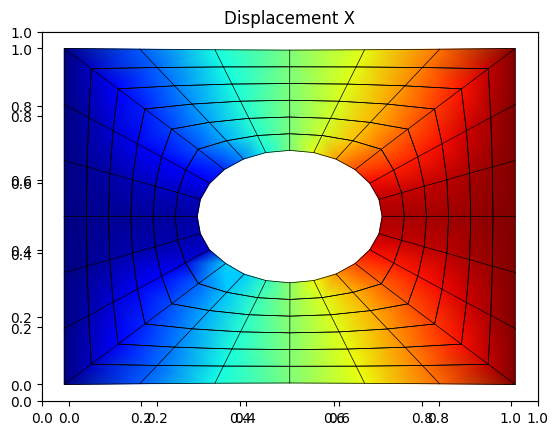

In [153]:
fig_1 =  plt.figure(1)
plt.title('Displacement X')
axdisp_x = fig_1.add_subplot(111)

for i in range(np.size(EL,0)):
    x = X[:,i]
    y = Y[:,i]
    c = disp_xNormalized[:,i]
    # gouraud smoothes the results
    cmap = truncate_colormap(plt.get_cmap('jet'),c.min(),c.max())
    t = axdisp_x.tripcolor( x,y,c,cmap=cmap, shading='gouraud')
    p = axdisp_x.plot(x,y,'k-',lw=0.5)


# Exercise -- theory

Using triangular elements compare the results:
- What differences do you see
- How long does it take
- Which result do you prefer


# Exercise -- coding

Assume that the structure above is the bolt hole at the end of a plate. 
You are assigned by your future employer, Colomes Industries Inc., to answer the following questions:

If we excpect a displacement on the top side of 0.1 (CORRECT NAME RERFERENCE), show me the stresses in the plate if
- We use a bolt (assume no displacement around the hole)
- We us a welded seem (no displacement at the bottom edge, R=0)
- Which one would we prefer in a cycclic loading case? Can we optimise the design of the plate?

*Hint*: Think about which functions you need to change in order to get to your result. Leave the rest untouched